In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
# Load dataset
df = pd.read_csv("Income_expense_data.csv")
df.head()

,REF_DATE,GEO,Statistic,Before-tax household income quintile,"Household expenditures, summary-level categories",UOM,COORDINATE,Expense,Family type,Age of older adult,Family income,Income
0,2010,Province 1,Average expenditure per household,All quintiles,Total expenditure,Dollars,C1,72075.0,Couple families,Total all ages,All income groups,7989380.0
1,2010,Province 1,Average expenditure per household,All quintiles,Food purchased from stores,Dollars,C2,5709.0,Couple families,Total all ages,"Under $10,000",189700.0
2,2010,Province 1,Average expenditure per household,All quintiles,Food purchased from restaurants,Dollars,C3,2141.0,Couple families,Total all ages,"$10,000 and over",7799670.0
3,2010,Province 1,Average expenditure per household,All quintiles,Shelter,Dollars,C4,15020.0,Couple families,Total all ages,"$15,000 and over",7695970.0
4,2010,Province 1,Average expenditure per household,All quintiles,Principal accommodation,Dollars,C5,13586.0,Couple families,Total all ages,"$20,000 and over",7552050.0


In [ ]:
# Using info function
df.info()

In [ ]:
# using describe function
df.describe()

In [19]:
# Checking is there is null values
df.isnull().sum()

REF_DATE                                              0
GEO                                                   0
Statistic                                             0
Before-tax household income quintile                  0
Household expenditures, summary-level categories      0
UOM                                                   0
COORDINATE                                            0
Expense                                             236
Family type                                           0
Age of older adult                                    0
Family income                                         0
Income                                                6
dtype: int64

In [23]:
# Question 1: What is the total household income per year?
# Goal: Calculate total income for each year (REF_DATE).

# Group by year amd sum income
total_income_per_year = df.groupby("REF_DATE")["Income"].sum()

# Display results
print(total_income_per_year)

# Insight: This will give you a trend of how total household income has changed from 2010 to 2021

REF_DATE
2010    231332020.0
2011    236453650.0
2012    240630900.0
2013    244531010.0
2014    248958970.0
2015    252134020.0
2016    255105340.0
2017    259694610.0
2019    268610440.0
2021    281113150.0
Name: Income, dtype: float64


In [27]:
# Question 2: What is the average expense per province?
# Goal: Calculate the average household expenditure per province

# # Group by province and calculate the average expense
avg_expense_per_province = df.groupby("GEO")["Expense"].mean()

# # Display results
print(avg_expense_per_province)

# Insight: This tells us which provinces have higher or lower average household expenses.

GEO
Province 1      9913.831207
Province 10     9294.256487
Province 11    10097.058175
Province 12    12217.614688
Province 13    10725.302000
Province 2      8409.790196
Province 3      8935.938062
Province 4      8601.477487
Province 5      8689.465070
Province 6      8174.689311
Province 7      8358.220356
Province 8     10683.486540
Province 9     11046.595285
Name: Expense, dtype: float64


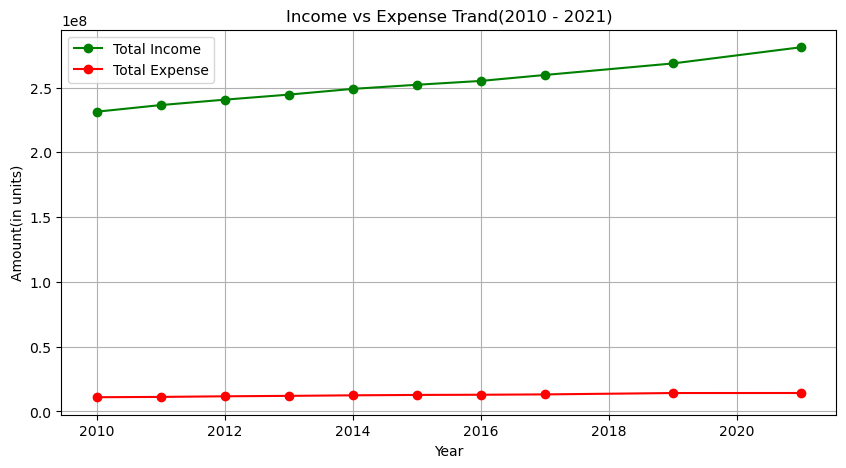

In [35]:
# Question 3: What is the trend of income vs. expenses over the years?
# Goal: Create a line chart showing yearly total income and total expenses. 

# Group by year and sum income & expense
yearly_data = df.groupby("REF_DATE")[["Income","Expense"]].sum()

# Plot the data
plt.figure(figsize = (10, 5))

plt.plot(yearly_data.index, yearly_data["Income"], marker = 'o', linestyle = '-', label = "Total Income", color = 'green')

plt.plot(yearly_data.index, yearly_data["Expense"], marker = 'o', linestyle = '-', label = "Total Expense", color = "red")

# Lables  and title
plt.xlabel("Year")
plt.ylabel("Amount(in units)")
plt.title("Income vs Expense Trand(2010 - 2021)")
plt.legend()
plt.grid(True)
plt.show()

# Insight: This chart helps identify whether expenses are growing faster than income over time.                        

In [37]:
# Question 4: Which family type has the highest average income?
# Goal: Find out which family type earns the most on average.

# Group by family type and calculate the average income
avg_income_family = df.groupby("Family type")["Income"].mean()

# Display result
print(avg_income_family.sort_values(ascending = False))

# Insight: This helps in understanding how income distribution varies among different family structures.

Family type
Couple families    190022.944771
Name: Income, dtype: float64


In [39]:
# Question 5: How does age affect household expenditure?
# Goal: Compare expenses for different age groups.

# Group by Age of older adult and calculate the average expense
avg_expense_by_age = df.groupby("Age of older adult")["Expense"].mean()

# Display results
print(avg_expense_by_age.sort_values(ascending = False))

# Insight: This will show which age groups tend to spend more or less.

Age of older adult
55 to 64 years    17136.686247
45 to 54 years    11196.223385
Total all ages     9476.128054
35 to 44 years     8554.008208
25 to 34 years     6509.507579
0 to 24 years      4834.847216
Name: Expense, dtype: float64


In [47]:
# Question 6: What is the correlation between income and expenses?
# Goal: Find out if there’s a strong relationship between income and expenses.

# Compute correlation
correlation = np.corrcoef(df["Income"],df["Expense"])[0,1]

# Display result
print("Correlation between Income and Expense: ",correlation)

# Insight
# If correlation ≈ 1, higher income leads to higher expenses.
# If correlation ≈ 0, there’s no direct relationship.
# If correlation ≈ -1, higher income leads to lower expenses (unlikely).

Correlation between Income and Expense:  nan


In [49]:
# Question 7: Which income quintile spends the most?
# Goal: Find out which income group (richest, middle-class, poorest, etc.) spends the most.

# # Group by income quintile and sum expenses
expense_by_quintile = df.groupby("Before-tax household income quintile")["Expense"].sum()

# Display results
print(expense_by_quintile.sort_values(ascending = False))

# Insight: Higher-income groups tend to spend more, but the lowest income groups may also spend a high proportion of their income.

Before-tax household income quintile
Highest quintile    36758192.0
Fourth quintile     24609299.0
All quintiles       20942243.0
Third quintile      18758940.0
Second quintile     14171198.0
Lowest quintile     10158014.0
Name: Expense, dtype: float64


In [51]:
# Question 8: Which provinces have the highest income-to-expense ratio?
# Goal: Compare income vs. expense per province

# Group by province and sum income and expenses
income_expense_ratio = df.groupby("GEO")[["Income","Expense"]].sum()

# Calculate the ratio
income_expense_ratio["Ratio"] = income_expense_ratio["Income"]/income_expense_ratio["Expense"]

# Display results
print(income_expense_ratio.sort_values(by = "Ratio", ascending = False))

# Insight:
# Provinces with a high ratio = More savings
# Provinces with a low ratio = More financial stress

                   Income     Expense       Ratio
GEO                                              
Province 1   1.814789e+09  10102194.0  179.643059
Province 9   4.170304e+08  11245434.0   37.084418
Province 5   5.107633e+07   8706844.0    5.866228
Province 7   4.373935e+07   8458519.0    5.171041
Province 11  4.881694e+07  10066767.0    4.849317
Province 2   3.358644e+07   8577986.0    3.915423
Province 6   2.656316e+07   8182864.0    3.246194
Province 3   1.727165e+07   8944874.0    1.930899
Province 10  1.397480e+07   9312845.0    1.500594
Province 4   1.218785e+07   8214411.0    1.483716
Province 12  1.521275e+07  12144309.0    1.252665
Province 13  1.251485e+07  10725302.0    1.166853
Province 8   1.180059e+07  10715537.0    1.101260


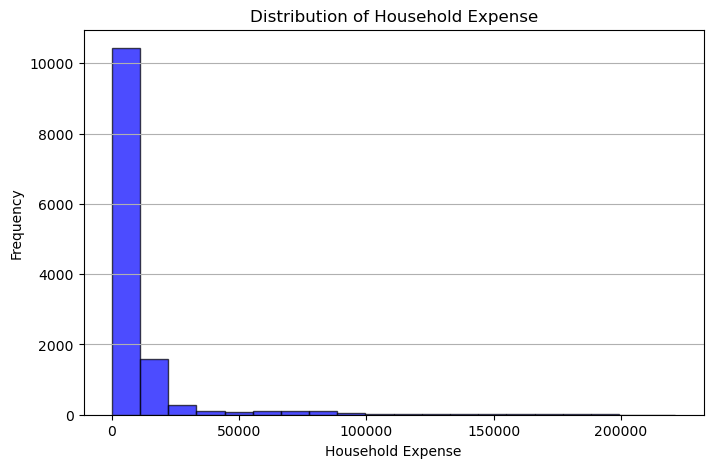

In [55]:
# Question 9: How does expense distribution look?
# Goal: Show a histogram of household expenses.

# Plot histogram
plt.figure(figsize = (8,5))
plt.hist(df["Expense"], bins = 20, color = 'blue',alpha = 0.7, edgecolor = 'black')

# Labels and title
plt.xlabel("Household Expense")
plt.ylabel("Frequency")
plt.title("Distribution of Household Expense")
plt.grid(axis = 'y')
plt.show()

# Insight: This helps us understand if expenses are normally distributed or skewed.

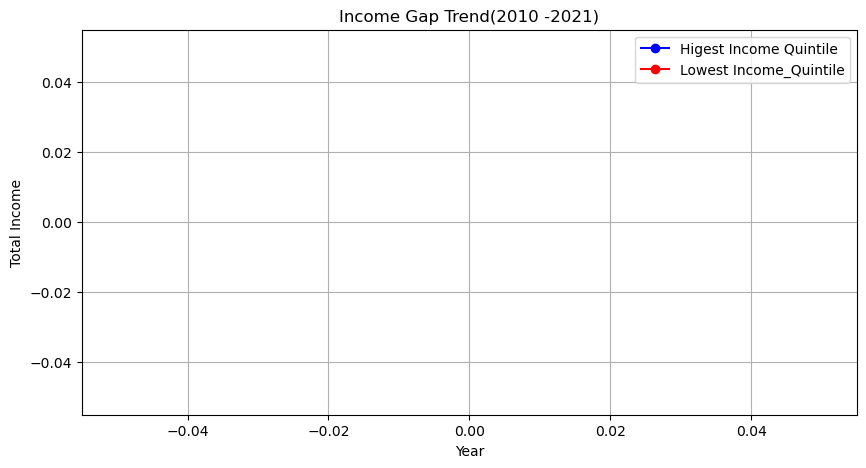

In [61]:
# Question 10: What is the trend of income inequality?
# Goal: Track the income gap between the highest and lowest quintiles.

# Filter data for highest & lowest income quintiles
high_income = df[df["Before-tax household income quintile"] == "Highest"]
low_income = df[df["Before-tax household income quintile"] == "Lowest"]

# Group by year and sum income
high_income_trend = high_income.groupby("REF_DATE")["Income"].sum()
low_income_trend = low_income.groupby("REF_DATE")["Income"].sum()

# Plot the data
plt.figure(figsize = (10, 5))
plt.plot(high_income_trend.index,high_income_trend, marker= 'o', linestyle = '-',label = "Higest Income Quintile", color = 'blue')
plt.plot(low_income_trend.index, low_income_trend, marker = 'o', linestyle = '-', label = "Lowest Income_Quintile", color = 'red')

# Lable and Title
plt.xlabel("Year")
plt.ylabel("Total Income")
plt.title("Income Gap Trend(2010 -2021)")
plt.legend()
plt.grid(True)
plt.show()

# Insight: This shows if income inequality is increasing or decreasing over time.
          

In [63]:
# Question 11: What is the median expense by province?
# Goal: Find out the median (middle value) of household expenses per province.

# Group by province and calculate median expense
median_expense_province = df.groupby("GEO")["Expense"].median()

# Display results
print(median_expense_province.sort_values(ascending = False))

# Insight: The median is often a better measure than the average when there are extreme values.

GEO
Province 12    3892.0
Province 8     3552.0
Province 9     3548.5
Province 13    3493.5
Province 11    3331.0
Province 1     3277.0
Province 4     3139.0
Province 3     3084.0
Province 10    3017.0
Province 5     3000.5
Province 2     2954.5
Province 6     2866.0
Province 7     2762.5
Name: Expense, dtype: float64


In [67]:
# Question 12: Which provinces have the highest number of records?
# Goal: Count how many records exist for each province.

# Count number of records per province
record_count = df["GEO"].value_counts()

# Display results
print(record_count)

# Insight: This helps us understand if some provinces have more data points than others.

GEO
Province 1     1020
Province 2     1020
Province 3     1020
Province 4     1020
Province 5     1020
Province 6     1020
Province 7     1020
Province 8     1020
Province 9     1020
Province 10    1020
Province 11    1020
Province 12    1020
Province 13    1020
Name: count, dtype: int64


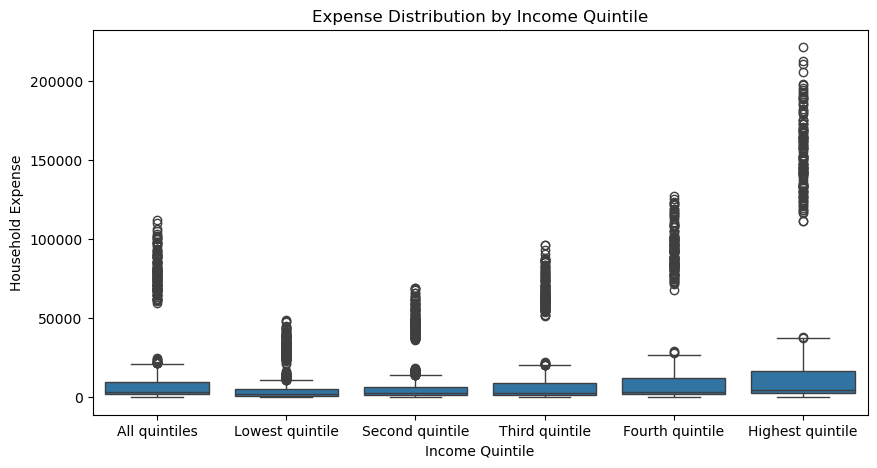

In [73]:
#  Question 13: How does expense distribution vary among income quintiles?
# Goal: Compare household expenses for different income levels using a box plot.

# Plot boxplot
plt.figure(figsize = (10, 5))

sns.boxplot(x = df["Before-tax household income quintile"], y = df["Expense"])

# Labels ans Title
plt.xlabel("Income Quintile")
plt.ylabel("Household Expense")
plt.title("Expense Distribution by Income Quintile")
plt.show()
           
# Insight: This shows how expenses vary within each income level and highlights outliers.

In [77]:
# Question 14: Which age group has the highest savings?
# Goal: Find which age group has the highest income-to-expense ratio (Savings).

# Group by age and sum income & expense
age_savings = df.groupby("Age of older adult")[["Income", "Expense"]].sum()

# Calculate savings ratio
age_savings["Savings Ratio"] = age_savings["Income"] / age_savings["Expense"]

# Display results
print(age_savings.sort_values(by = "Savings Ratio", ascending = False))

# Insight: Higher ratios mean more savings; lower ratios mean higher spending relative to income

                          Income     Expense  Savings Ratio
Age of older adult                                         
Total all ages      1.386850e+09  20942243.0      66.222600
35 to 44 years      2.942892e+08  18758940.0      15.687945
45 to 54 years      3.232403e+08  24609299.0      13.134885
25 to 34 years      1.840406e+08  14171198.0      12.986945
55 to 64 years      3.115484e+08  36758192.0       8.475619
0 to 24 years       1.859581e+07  10158014.0       1.830654


In [85]:
# Question 15: What is the year-over-year income growth rate?
# Goal: Calculate the percentage increase in total income each year

# Group by year and sum income
yearly_income = df.groupby("REF_DATE")["Income"].sum()

# Calculate percentage growth
income_growth = yearly_income.pct_change()*100

# Display results
print(income_growth)

# Insight: This shows how income is growing (or declining) over time.

REF_DATE
2010         NaN
2011    2.213974
2012    1.766625
2013    1.620785
2014    1.810797
2015    1.275331
2016    1.178468
2017    1.798971
2019    3.433198
2021    4.654588
Name: Income, dtype: float64


In [91]:
# Question 16: What percentage of income is spent on expenses per year?
# Goal: Calculate the Expense-to-Income ratio for each year.

# Group by year and sum income & expense
yearly_data  = df.groupby("REF_DATE")[["Income", "Expense"]].sum()

# Calculate expense-to-income ratio
yearly_data["Expense Ratio"] = (yearly_data["Expense"]/yearly_data["Income"]) * 100

# Display results
print(yearly_data["Expense Ratio"])

# Insight: A higher percentage means people are spending more relative to their income.

REF_DATE
2010    4.736835
2011    4.734893
2012    4.851527
2013    4.910126
2014    4.991310
2015    5.047809
2016    5.043371
2017    5.059396
2019    5.281882
2021    5.057414
Name: Expense Ratio, dtype: float64


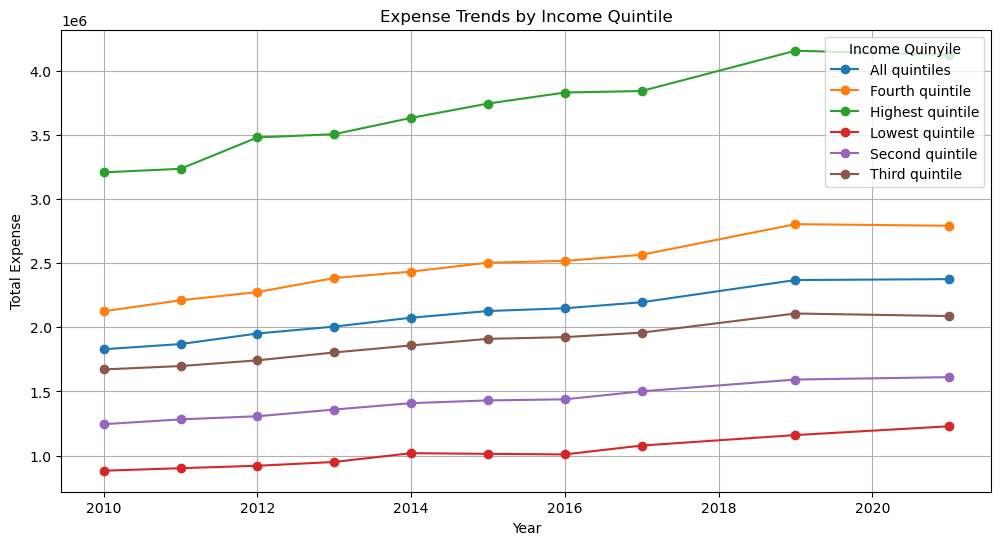

In [99]:
# Question 17: How do expenses vary over time for each income group?
# Goal: Compare expense trends across income quintiles.

# Group by year and income quintile, then sum expenses
expense_trend = df.groupby(["REF_DATE", "Before-tax household income quintile"])["Expense"].sum().unstack()

# Plot the data 
expense_trend.plot(figsize = (12,6), marker = 'o')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Expense")
plt.title("Expense Trends by Income Quintile")
plt.legend(title = "Income Quinyile")
plt.grid(True)
plt.show()

# Insight: This shows how spending habits change over time for different income groups.

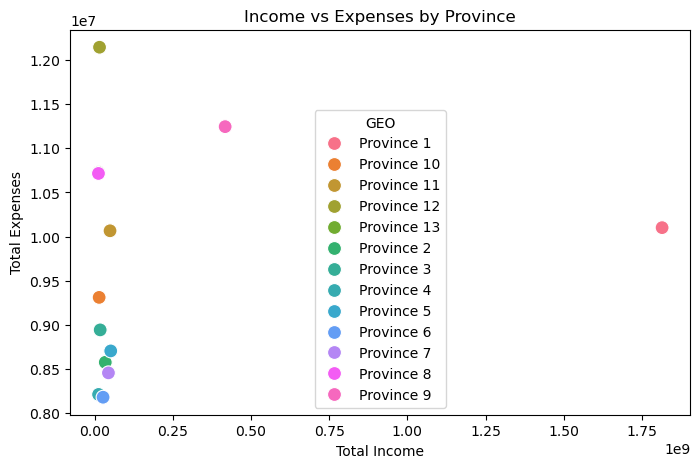

In [104]:
# Question 18: How do different provinces compare in income and expense distribution?
# Goal: Create a scatter plot to visualize the relationship between income and expense by province.

# Group by province and sum income & expense
province_data = df.groupby("GEO")[["Income", "Expense"]].sum()

# Scatter plot
plt.figure(figsize = (8,5))
sns.scatterplot(x = province_data["Income"], y = province_data["Expense"], hue = province_data.index, s = 100)

# Labels and title
plt.xlabel("Total Income")
plt.ylabel("Total Expenses")
plt.title("Income vs Expenses by Province")
plt.show()


# Insight: This helps identify which provinces earn and spend the most.

In [106]:
# Question 19: What is the most common expense category?
# Goal: Find which expense type occurs most frequently in the dataset.

# Count frequency of each expense category
expense_Category_Counts = df["Household expenditures, summary-level categories"].value_counts()

# Display results
print(expense_Category_Counts)

# Insight: This tells us where households spend the most money

Household expenditures, summary-level categories
Total expenditure                                          780
Household operations                                       780
Clothing and accessories                                   780
Household appliances                                       780
Household equipment                                        780
Household furnishings                                      780
Household furnishings and equipment                        780
Communications                                             780
Other accommodation                                        780
Food purchased from stores                                 780
Water, fuel and electricity for principal accommodation    780
Owned living quarters                                      780
Rented living quarters                                     780
Principal accommodation                                    780
Shelter                                                    780
Food p

In [ ]:
# Question 20: Can we predict household expenses based on income?
# Goal: Fit a linear regression model to predict expenses based on income.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
Data Science | ARPITA ROY
Page | 12
# Prepare data
X = df[["Income"]]
y = df["Expense"]
# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs. Predicted Expenses")
plt.grid(True)
plt.show()

# Insight:
# If the model performs well, it means income is a strong predictor of expenses.
# If the error is high, other factors may influence expenses.